In [97]:
#for data manipulation
import numpy as np
import pandas as pd

#for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#for interactive analysis
from ipywidgets import interact

import warnings
warnings.filterwarnings("ignore")

In [98]:
# lets check teh shape of the dataset
print("Shape of the Dataset :", data.shape)

Shape of the Dataset : (2200, 8)


In [99]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [124]:
# Lets read the Dataset
data=pd.read_csv("data.csv")
print (data)

        N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]


In [101]:
# lets check if there is any missing value present in the dataset
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

<Axes: >

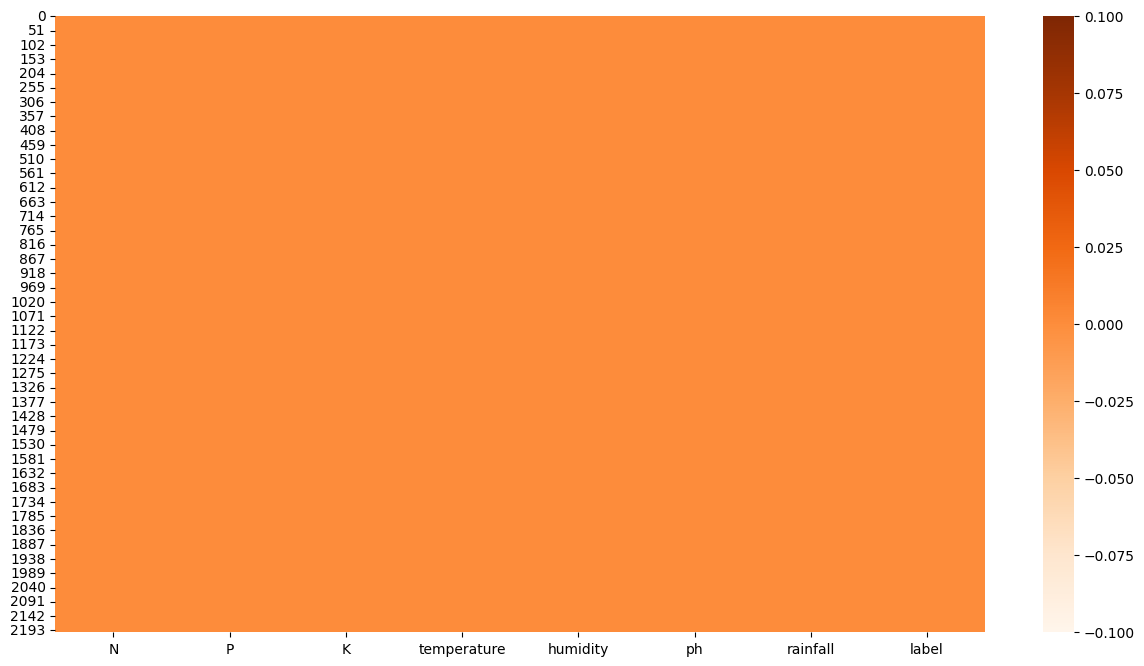

In [102]:
# lets check if there is any missing value present in the dataset using map
sns.heatmap(data.isnull(), cmap= "Oranges")

In [103]:
# lets check the Crops present in this Dataset
data['label'].value_counts()

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

In [104]:
# lets check the Summary for all the crops (Descriptive statistics)

print("Average Ratio of Nitrogen in the Soil : {0:.2f}".format(data['N'].mean()))
print("Average Ratio of Phosphorous in the Soil : {0:.2f}".format(data['P'].mean()))
print("Average Ratio of Potassium in the Soil : {0:.2f}".format(data['K'].mean()))
print("Average Tempature in Celsius : {0:.2f}".format(data['temperature'].mean()))
print("Average Relative Humidity in % : {0:.2f}".format(data['humidity'].mean()))
print("Average PH Value of the soil : {0:.2f}".format(data['ph'].mean()))
print("Average Rainfall in mm : {0:.2f}".format(data['rainfall'].mean()))

Average Ratio of Nitrogen in the Soil : 50.55
Average Ratio of Phosphorous in the Soil : 53.36
Average Ratio of Potassium in the Soil : 48.15
Average Tempature in Celsius : 25.62
Average Relative Humidity in % : 71.48
Average PH Value of the soil : 6.47
Average Rainfall in mm : 103.46


In [130]:
# Crop wise requirement
@interact
def summary(crops = list(data['label'].value_counts().index)):
    x = data[data['label'] == crops]
    print("---------------------------------------------")
    print("Statistics for Nitrogen")
    print("Minimum Nitrigen required :", x['N'].min())
    print("Average Nitrogen required :", x['N'].mean())
    print("Maximum Nitrogen required :", x['N'].max()) 
    print("---------------------------------------------")
    print("Statistics for Phosphorous")
    print("Minimum Phosphorous required :", x['P'].min())
    print("Average Phosphorous required :", x['P'].mean())
    print("Maximum Phosphorous required :", x['P'].max()) 
    print("---------------------------------------------")
    print("Statistics for Potassium")
    print("Minimum Potassium required :", x['K'].min())
    print("Average Potassium required :", x['K'].mean())
    print("Maximum Potassium required :", x['K'].max()) 
    print("---------------------------------------------")
    print("Statistics for Temperature")
    print("Minimum Temperature required : {0:.2f}".format(x['temperature'].min()))
    print("Average Temperature required : {0:.2f}".format(x['temperature'].mean()))
    print("Maximum Temperature required : {0:.2f}".format(x['temperature'].max()))
    print("---------------------------------------------")
    print("Statistics for Humidity")
    print("Minimum Humidity required : {0:.2f}".format(x['humidity'].min()))
    print("Average Humidity required : {0:.2f}".format(x['humidity'].mean()))
    print("Maximum Humidity required : {0:.2f}".format(x['humidity'].max()))
    print("---------------------------------------------")
    print("Statistics for PH")
    print("Minimum PH required : {0:.2f}".format(x['ph'].min()))
    print("Average PH required : {0:.2f}".format(x['ph'].mean()))
    print("Maximum PH required : {0:.2f}".format(x['ph'].max()))
    print("---------------------------------------------")
    print("Statistics for Rainfall")
    print("Minimum Rainfall required : {0:.2f}".format(x['rainfall'].min()))
    print("Average Rainfall required : {0:.2f}".format(x['rainfall'].mean()))
    print("Maximum Rainfall required : {0:.2f}".format(x['rainfall'].max()))

interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'chickpea', 'kidneybeans', 'pige…

In [106]:
# Lets compare the Average Requirement for each crops with average conditions

@interact
def compare(conditions = ['N','P','K','temperature','ph','humidity','rainfall']):
    print("Average Value for", conditions,"is {0:.2f}".format(data[conditions].mean()))
    print("----------------------------------------------")
    print("Rice : {0:.2f}".format(data[(data['label'] == 'rice')][conditions].mean()))
    print("Black Grams : {0:.2f}".format(data[data['label'] == 'blackgram'][conditions].mean()))
    print("Banana : {0:.2f}".format(data[(data['label'] == 'banana')][conditions].mean()))
    print("Jute : {0:.2f}".format(data[data['label'] == 'jute'][conditions].mean()))
    print("Coconut : {0:.2f}".format(data[(data['label'] == 'coconut')][conditions].mean()))
    print("Apple : {0:.2f}".format(data[data['label'] == 'apple'][conditions].mean()))
    print("Papaya : {0:.2f}".format(data[(data['label'] == 'papaya')][conditions].mean()))
    print("Muskmelon : {0:.2f}".format(data[data['label'] == 'muskmelon'][conditions].mean()))
    print("Grapes : {0:.2f}".format(data[(data['label'] == 'grapes')][conditions].mean()))
    print("Watermelon : {0:.2f}".format(data[data['label'] == 'watermelon'][conditions].mean()))
    print("Kidney Beans: {0:.2f}".format(data[(data['label'] == 'kidneybeans')][conditions].mean()))
    print("Mung Beans : {0:.2f}".format(data[data['label'] == 'mungbean'][conditions].mean()))
    print("Oranges : {0:.2f}".format(data[(data['label'] == 'orange')][conditions].mean()))
    print("Chick Peas : {0:.2f}".format(data[data['label'] == 'chickpea'][conditions].mean()))
    print("Lentils : {0:.2f}".format(data[(data['label'] == 'lentil')][conditions].mean()))
    print("Cotton : {0:.2f}".format(data[data['label'] == 'cotton'][conditions].mean()))
    print("Maize : {0:.2f}".format(data[(data['label'] == 'maize')][conditions].mean()))
    print("Moth Beans : {0:.2f}".format(data[data['label'] == 'mothbeans'][conditions].mean()))
    print("Pigeon Peas : {0:.2f}".format(data[(data['label'] == 'pigeonpeas')][conditions].mean()))
    print("Mango : {0:.2f}".format(data[data['label'] == 'mango'][conditions].mean()))
    print("Pomegranate : {0:.2f}".format(data[(data['label'] == 'pomegranate')][conditions].mean()))
    print("Coffee : {0:.2f}".format(data[data['label'] == 'coffee'][conditions].mean()))

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

In [107]:
# lets make this funtion more Intuitive

@interact
def compare(conditions = ['N','P','K','temperature','ph','humidity','rainfall']):
    print("Crops which require greater than average", conditions,'\n')
    print(data[data[conditions] > data[conditions].mean()]['label'].unique())
    print("----------------------------------------------")
    print("Crops which require less than average", conditions,'\n')
    print(data[data[conditions] <= data[conditions].mean()]['label'].unique())

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

In [108]:
# Lets understand which crops can only be Grown in Summer Season, Winter Season and Rainy Season

print("Summer Crops")
print(data[(data['temperature'] > 30) & (data['humidity'] > 50)]['label'].unique())
print("-----------------------------------")
print("Winter Crops")
print(data[(data['temperature'] < 20) & (data['humidity'] > 30)]['label'].unique())
print("-----------------------------------")
print("Rainy Crops")
print(data[(data['rainfall'] > 200) & (data['humidity'] > 30)]['label'].unique())

Summer Crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
-----------------------------------
Winter Crops
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
-----------------------------------
Rainy Crops
['rice' 'papaya' 'coconut']


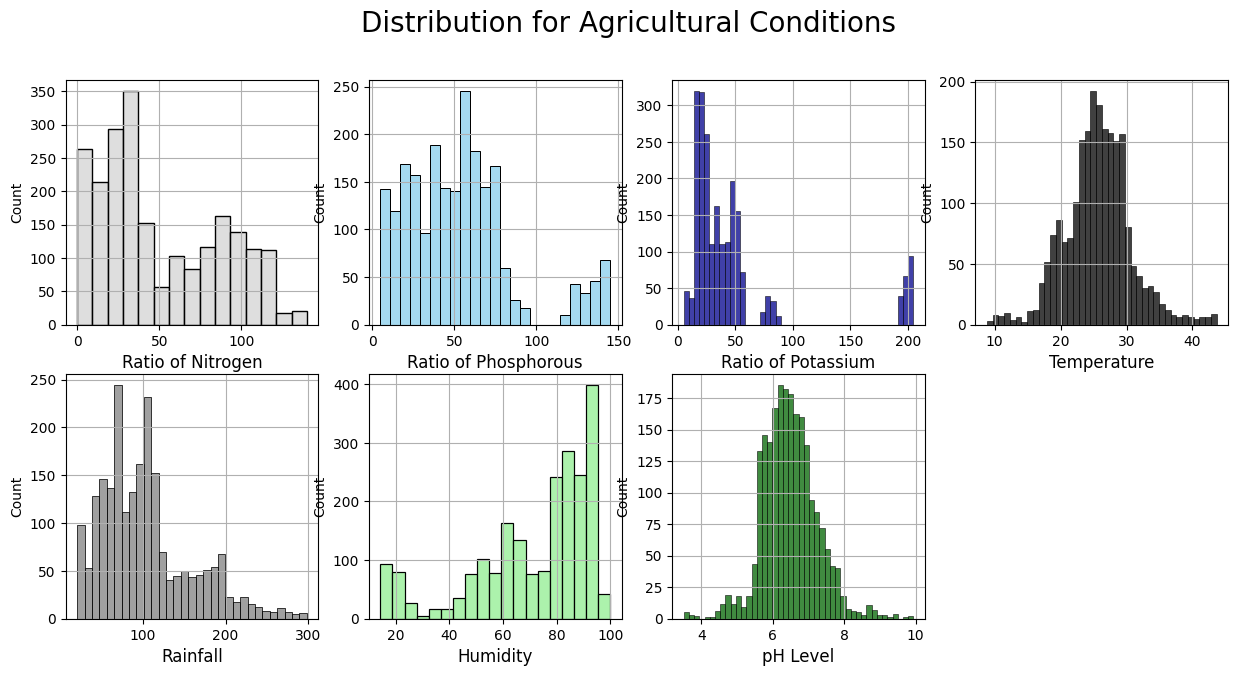

In [132]:
# Lets check the distribution of Agricultural Conditions -- Graph for Multi-variance

plt.rcParams['figure.figsize'] = (15, 7)

plt.subplot(2, 4, 1)
sns.histplot(data['N'], color = 'lightgrey')
plt.xlabel('Ratio of Nitrogen', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 2)
sns.histplot(data['P'], color = 'skyblue')
plt.xlabel('Ratio of Phosphorous', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 3)
sns.histplot(data['K'], color ='darkblue')
plt.xlabel('Ratio of Potassium', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 4)
sns.histplot(data['temperature'], color = 'black')
plt.xlabel('Temperature', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 5)
sns.histplot(data['rainfall'], color = 'grey')
plt.xlabel('Rainfall', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 6)
sns.histplot(data['humidity'], color = 'lightgreen')
plt.xlabel('Humidity', fontsize = 12)
plt.grid()

plt.subplot(2, 4, 7)
sns.histplot(data['ph'], color = 'darkgreen')
plt.xlabel('pH Level', fontsize = 12)
plt.grid()

plt.suptitle('Distribution for Agricultural Conditions', fontsize = 20)
plt.show()

In [110]:
# Lets find out some Interesting Facts

print("Some Interesting Patterns")
print("---------------------------------")
print("Crops which requires very High Ratio of Nitrogen Content in Soil:", data[data['N'] > 120]['label'].unique())
print("Crops which requires very High Ratio of Phosphorous Content in Soil:", data[data['P'] > 100]['label'].unique())
print("Crops which requires very High Ratio of Potassium Content in Soil:", data[data['K'] > 200]['label'].unique())
print("Crops which requires very High Rainfall:", data[data['rainfall'] > 200]['label'].unique())
print("Crops which requires very Low Temperature :", data[data['temperature'] < 10]['label'].unique())
print("Crops which requires very High Temperature :", data[data['temperature'] > 40]['label'].unique())
print("Crops which requires very Low Humidity:", data[data['humidity'] < 20]['label'].unique())
print("Crops which requires very Low pH:", data[data['ph'] < 4]['label'].unique())
print("Crops which requires very High pH:", data[data['ph'] > 9]['label'].unique())

Some Interesting Patterns
---------------------------------
Crops which requires very High Ratio of Nitrogen Content in Soil: ['cotton']
Crops which requires very High Ratio of Phosphorous Content in Soil: ['grapes' 'apple']
Crops which requires very High Ratio of Potassium Content in Soil: ['grapes' 'apple']
Crops which requires very High Rainfall: ['rice' 'papaya' 'coconut']
Crops which requires very Low Temperature : ['grapes']
Crops which requires very High Temperature : ['grapes' 'papaya']
Crops which requires very Low Humidity: ['chickpea' 'kidneybeans']
Crops which requires very Low pH: ['mothbeans']
Crops which requires very High pH: ['mothbeans']


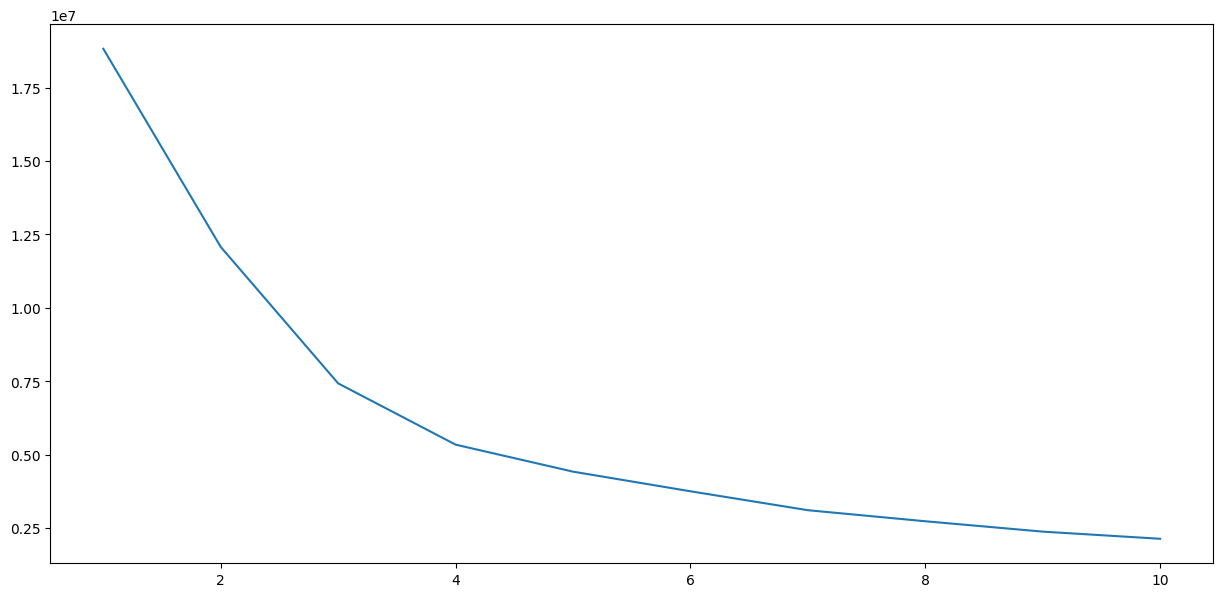

In [111]:
from pandas.core.common import random_state
from sklearn.cluster import KMeans 

x=data.drop(['label'], axis=1)
x=x.values
wcss=[]

for i in range(1,11):
  km=KMeans(n_clusters=i, init="k-means++", max_iter=2000, n_init=10, random_state=0)
  km.fit(x)
  wcss.append(km.inertia_)

plt.plot(range(1,11), wcss)
plt.show()

In [112]:
# cluster
km=KMeans(n_clusters=4, init="k-means++", max_iter=2000, n_init=10, random_state=0)
y_means=km.fit_predict(x)

a=data['label']
y_means=pd.DataFrame(y_means)
z=pd.concat([y_means, a], axis=1)

z=z.rename(columns={0:'cluster'})

print("Cluster 1", z[z['cluster']==0]['label'].unique())
print("Cluster 2", z[z['cluster']==1]['label'].unique())
print("Cluster 3", z[z['cluster']==2]['label'].unique())
print("Cluster 4", z[z['cluster']==3]['label'].unique())

Cluster 1 ['grapes' 'apple']
Cluster 2 ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
Cluster 3 ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
Cluster 4 ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']


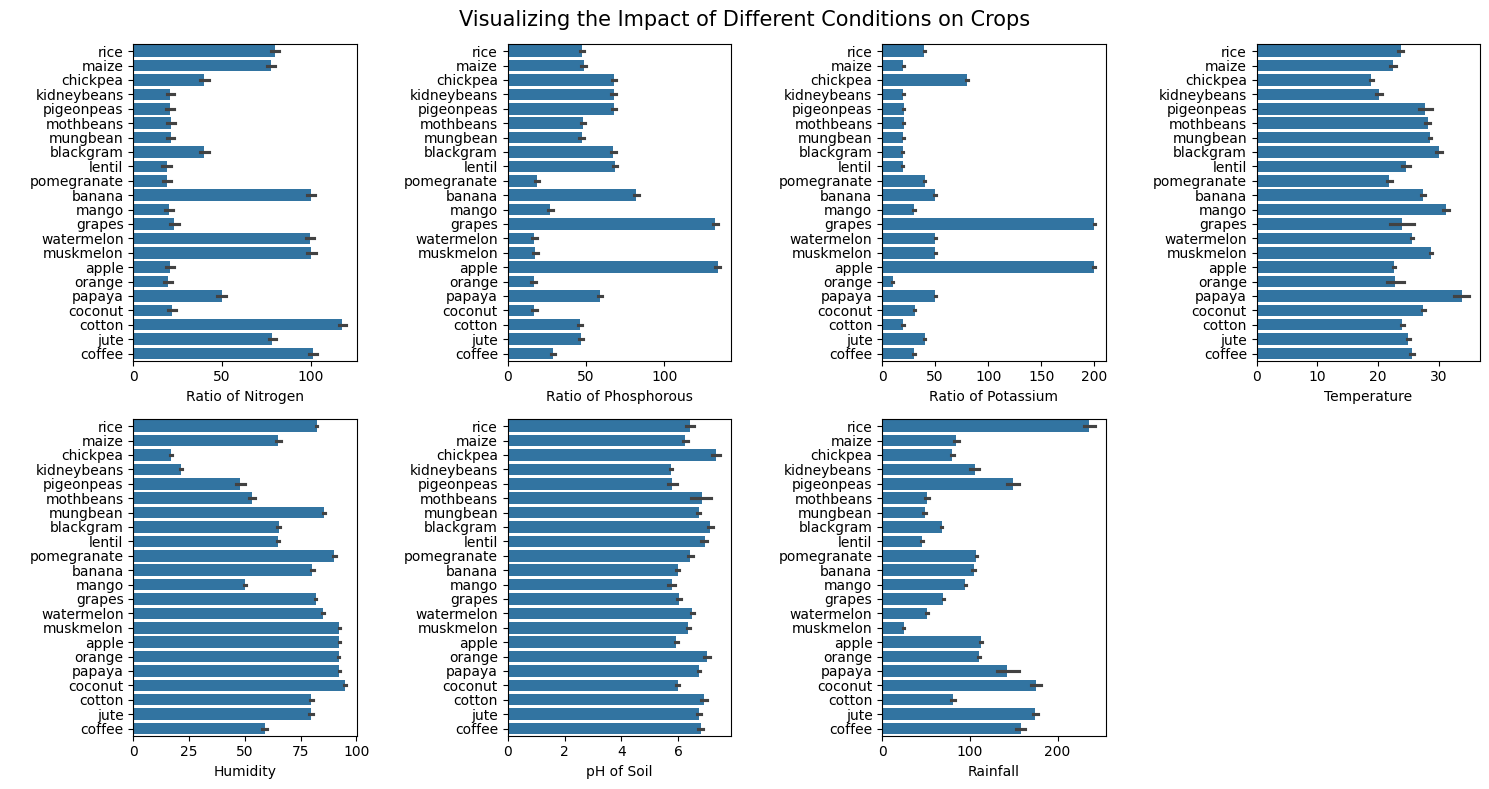

In [113]:
# Data Visualizations  --  visualizing the Hidden Patterns
plt.rcParams['figure.figsize'] = (15, 8)

plt.subplot(2, 4, 1)
sns.barplot(x=data['N'], y=data['label'])
plt.ylabel(' ')
plt.xlabel('Ratio of Nitrogen', fontsize=10)
plt.yticks(fontsize=10)

plt.subplot(2, 4, 2)
sns.barplot(x=data['P'], y=data['label'])
plt.ylabel(' ')
plt.xlabel('Ratio of Phosphorous', fontsize=10)
plt.yticks(fontsize=10)

plt.subplot(2, 4, 3)
sns.barplot(x=data['K'], y=data['label'])
plt.ylabel(' ')
plt.xlabel('Ratio of Potassium', fontsize=10)
plt.yticks(fontsize=10)

plt.subplot(2, 4, 4)
sns.barplot(x=data['temperature'], y=data['label'])
plt.ylabel(' ')
plt.xlabel('Temperature', fontsize=10)
plt.yticks(fontsize=10)

plt.subplot(2, 4, 5)
sns.barplot(x=data['humidity'], y=data['label'])
plt.ylabel(' ')
plt.xlabel('Humidity', fontsize=10)
plt.yticks(fontsize=10)

plt.subplot(2, 4, 6)
sns.barplot(x=data['ph'], y=data['label'])
plt.ylabel(' ')
plt.xlabel('pH of Soil', fontsize=10)
plt.yticks(fontsize=10)

plt.subplot(2, 4, 7)
sns.barplot(x=data['rainfall'], y=data['label'])
plt.ylabel(' ')
plt.xlabel('Rainfall', fontsize=10)
plt.yticks(fontsize=10)

plt.suptitle('Visualizing the Impact of Different Conditions on Crops', fontsize=15)
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [114]:
#lets split the Dataset for Predictive Modelling -- Predective Modelling
y = data['label']
x = data.drop(['label'], axis = 1)

print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (2200, 7)
Shape of y: (2200,)


In [115]:
# lets create Training and Testing Sets for Validation of Results
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

print("The Shape of x train:", x_train.shape)
print("The Shape of x test:", x_test.shape)
print("The Shape of y train:", y_train.shape)
print("The Shape of y test:", y_test.shape)

The Shape of x train: (1760, 7)
The Shape of x test: (440, 7)
The Shape of y train: (1760,)
The Shape of y test: (440,)


In [116]:
# lets create a Predictive Model -- Logistic Regression
from sklearn.linear_model import LogisticRegression

model= LogisticRegression()
model.fit(x_train, y_train)
y_pred=model.predict(numpy.array([[20, 7, 10, 30, 90, 7, 100]]))

print(y_pred)

['orange']


In [117]:
# Data accuracy
y_pred=model.predict(x_test)
from sklearn.metrics import classification_report
cr=classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        18
      banana       1.00      1.00      1.00        18
   blackgram       0.86      0.82      0.84        22
    chickpea       1.00      1.00      1.00        23
     coconut       1.00      1.00      1.00        15
      coffee       1.00      1.00      1.00        17
      cotton       0.89      1.00      0.94        16
      grapes       1.00      1.00      1.00        18
        jute       0.84      1.00      0.91        21
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      0.94      0.94        17
       maize       0.94      0.89      0.91        18
       mango       1.00      1.00      1.00        21
   mothbeans       0.88      0.92      0.90        25
    mungbean       1.00      1.00      1.00        17
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        23
      papaya       1.00    

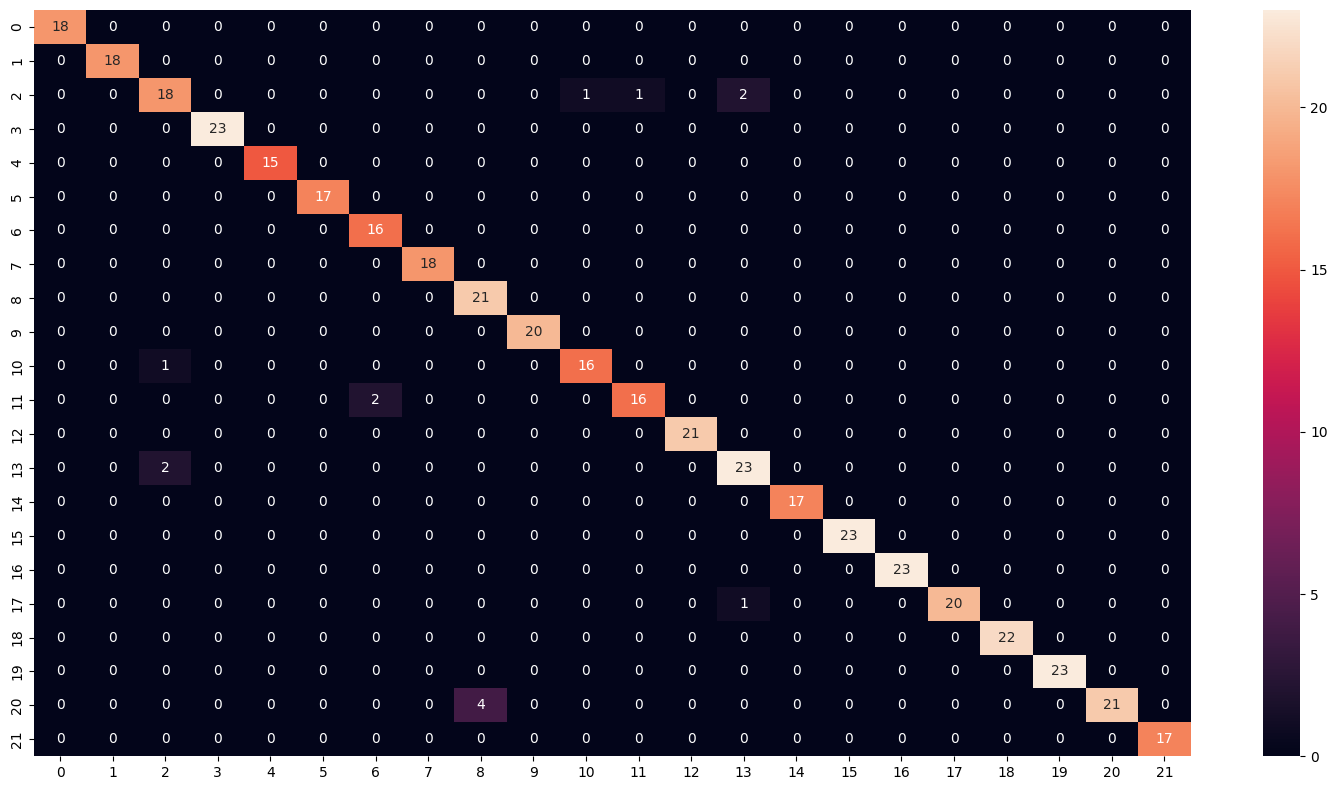

In [118]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)
plt.tight_layout()

In [121]:
# lets do some Real time Predictions

prediction = model.predict((np.array([[90,
                                       40,
                                       40,
                                       20,
                                       80,
                                       7,
                                       200]])))
print("The Suggested Crop for Given Climatic Condition is :", prediction)

The Suggested Crop for Given Climatic Condition is : ['rice']


In [122]:
# lets do some Real time Predictions
prediction = model.predict((np.array([[20,
                                       30,
                                       10,
                                       15,
                                       90,
                                       7.5,
                                       100]])))
print("The Suggested Crop for Given Climatic Condition is :", prediction)

The Suggested Crop for Given Climatic Condition is : ['orange']


In [123]:
# lets do some Real time Predictions
prediction = model.predict((np.array([[20,
                                       30,
                                       10,
                                       15,
                                       90,
                                       7.5,
                                       100]])))
print("The Suggested Crop for Given Climatic Condition is :", prediction)

The Suggested Crop for Given Climatic Condition is : ['orange']
